## Введение (Introduction)  
Данный блокнот является дополнительным материалом к статье по демонстрации примеров линейной регрессии представленной публикации на портале Habrahabr –     
    
Учитывая возможные ошибки вызванные техническими и «человеческими» факторами при обработке данных, рекомендуется применение данного набора исключительно в демонстрационных целях.   
________________________________________________________
This notebook is an additional material to the article on demonstrating examples of linear regression of the presented publication on the portal Habrahabr -
Materials may contain errors, not recommended for serious research.  
P.S. English text from google translate :)


## Описание данных (Data description)  
    
Данные о регистрации актов гражданского состояния в Москве с 2010 года по настоящее время с разбивкой по месяцам. Например, регистрации браков, рождений, смертей, установлений отцовства, смены имени и т.п.  
Подробное описание данных по адресу: https://data.mos.ru/opendata/7704111479-dinamika-registratsii-aktov-grajdanskogo-sostoyaniya/description?versionNumber=2&releaseNumber=33
_________________________________________________________________________________
Data of registration of acts of civil status in Moscow from 2010 to the present time by months. For example, registration of marriages, births, deaths, paternity establishments, name changes, etc.  
Detailed description of the data at: https://data.mos.ru/opendata/7704111479-dinamika-registratsii-aktov-grajdanskogo-sostoyaniya/description?versionNumber=2&releaseNumber=33



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Загрузка и предобработка (Download and preprocessing)

In [2]:
#download
df = pd.read_csv('https://op.mos.ru/EHDWSREST/catalog/export/get?id=230308', compression='zip', header=0, encoding='cp1251', sep=';', quotechar='"')
#look at the data
df.head(12)

,ID,global_id,Year,Month,StateRegistrationOfBirth,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,Unnamed: 12
0,1,37591658,2010,январь,9206,10430,4997,3302,1241,95,491,29762,NaN
1,2,37591659,2010,февраль,9060,9573,4873,2937,1326,97,639,28505,NaN
2,3,37591660,2010,март,10934,10528,3642,4361,1644,147,717,31973,NaN
3,4,37591661,2010,апрель,10140,9501,9698,3943,1530,128,642,35572,NaN
4,5,37591662,2010,май,9457,9482,3726,3554,1397,96,492,28204,NaN
5,6,62353812,2010,июнь,11253,9529,9148,3666,1570,130,556,35852,NaN
6,7,62353813,2010,июль,11477,14340,12473,3675,1568,123,564,44220,NaN
7,8,62353814,2010,август,10302,15016,10882,3496,1512,134,578,41920,NaN
8,9,62353816,2010,сентябрь,10140,9573,10736,3738,1480,101,686,36454,NaN
9,10,62353817,2010,октябрь,10776,9350,8862,3899,1504,89,687,35167,NaN


Закодируем месяца числовыми значениями и удалим ненужные для анализа столбцы
___________________________________________________________________________________
We will code the month with numeric values and delete the columns we do not need for analysis

In [3]:
#code months
d={'январь':1, 'февраль':2, 'март':3, 'апрель':4, 'май':5, 'июнь':6, 'июль':7,
       'август':8, 'сентябрь':9, 'октябрь':10, 'ноябрь':11, 'декабрь':12}
df.Month=df.Month.map(d)

#delete some unuseful columns
df.drop(['ID','global_id','Unnamed: 12'],axis=1,inplace=True)

#look at the data
df.head(12)

,Year,Month,StateRegistrationOfBirth,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber
0,2010,1,9206,10430,4997,3302,1241,95,491,29762
1,2010,2,9060,9573,4873,2937,1326,97,639,28505
2,2010,3,10934,10528,3642,4361,1644,147,717,31973
3,2010,4,10140,9501,9698,3943,1530,128,642,35572
4,2010,5,9457,9482,3726,3554,1397,96,492,28204
5,2010,6,11253,9529,9148,3666,1570,130,556,35852
6,2010,7,11477,14340,12473,3675,1568,123,564,44220
7,2010,8,10302,15016,10882,3496,1512,134,578,41920
8,2010,9,10140,9573,10736,3738,1480,101,686,36454
9,2010,10,10776,9350,8862,3899,1504,89,687,35167


Построим попарные графики зависимостей, но для наглядности возьмем только часть признаков
______________________________________________________________________
We construct pairwise graphs of dependencies, but for clarity we take only a part of the features


In [4]:
columns_to_show = ['StateRegistrationOfBirth', 'StateRegistrationOfMarriage', 
                   'StateRegistrationOfPaternityExamination', 'StateRegistrationOfDivorce','StateRegistrationOfDeath']
data=df[columns_to_show]

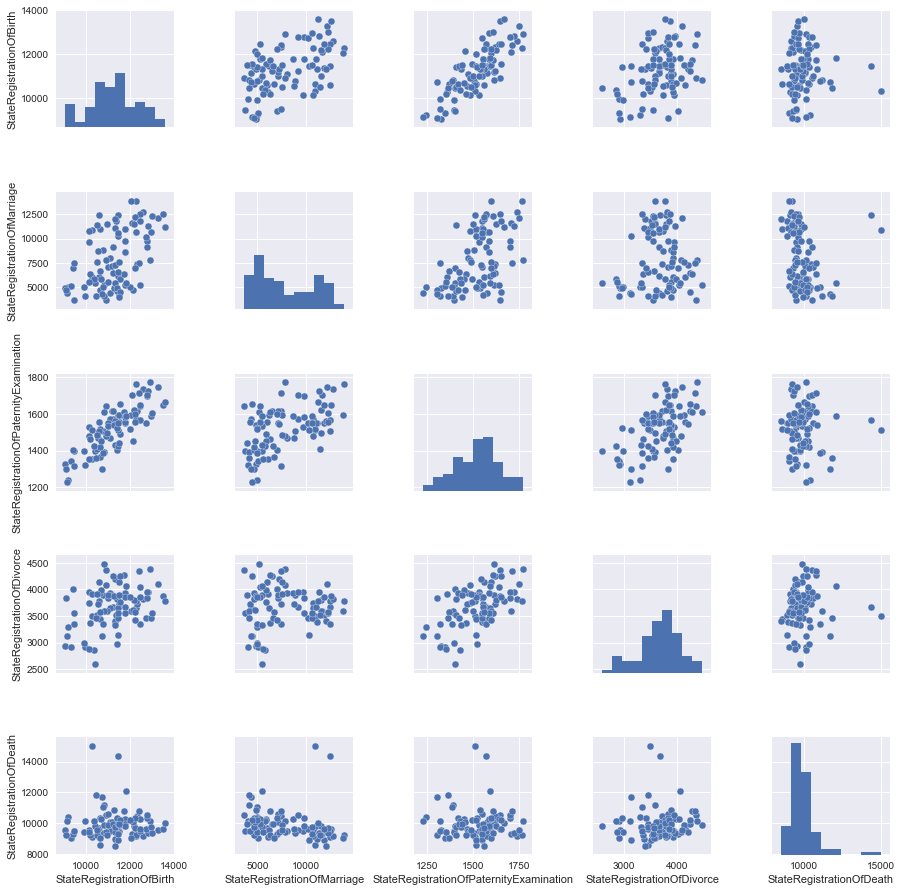

In [5]:
grid = sns.pairplot(data)

Посмотрим, изменит ли что-то масштабирование. 
   _____
Let's see the result of scaling.


In [6]:
# change scale of features
scaler = MinMaxScaler()
df2=pd.DataFrame(scaler.fit_transform(df))
df2.columns=df.columns
data2=df2[columns_to_show]

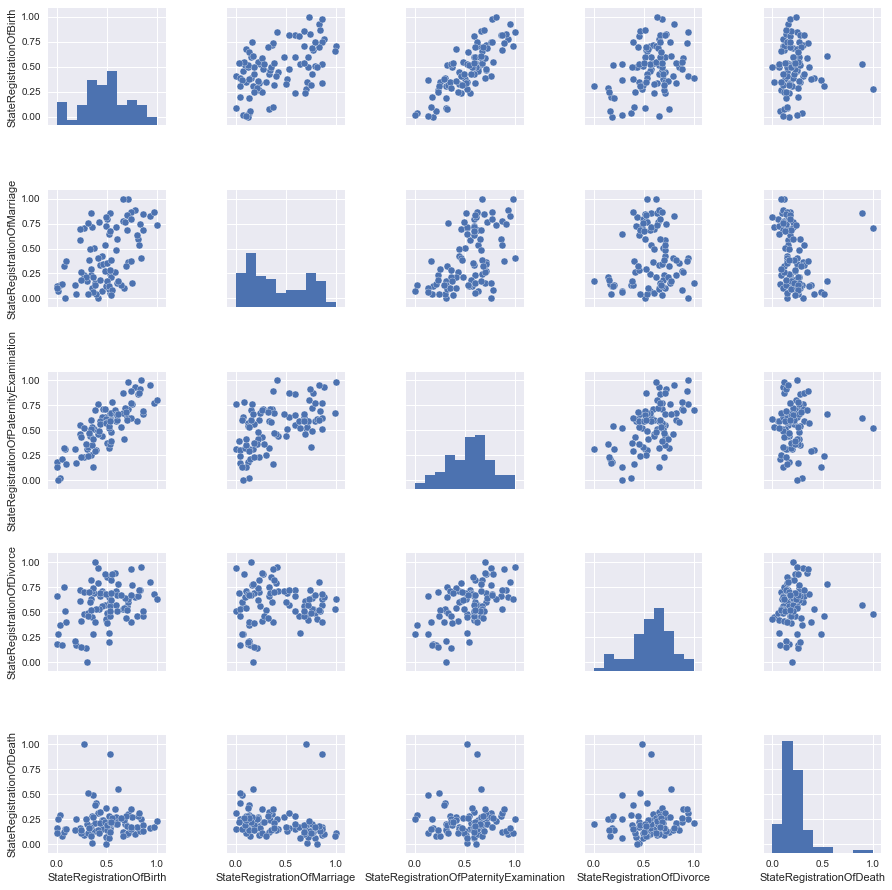

In [7]:
grid2 = sns.pairplot(data2)

Почти без разницы
______
Almost without difference


## Простейшая регрессия по 1 признаку (Regression 1 features)
Рассмотрим два параметра с наиболее выраженной линейной зависимостью StateRegistrationOfBirth и  StateRegistrationOfPaternityExamination
______________________
Consider two parameters with the most pronounced linear dependence StateRegistrationOfBirth and StateRegistrationOfPaternityExamination

In [8]:
#get data for model

X = data2['StateRegistrationOfBirth'].values
y  = data2['StateRegistrationOfPaternityExamination'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train=np.reshape(X_train,[X_train.shape[0],1])
y_train=np.reshape(y_train,[y_train.shape[0],1])
X_test=np.reshape(X_test,[X_test.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])

#teach model and get predictions
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_test,y_test))

Coefficients: [[ 0.78600258]]
Score: 0.611493944197


График для зависимости, полученной по обучающим данным
________
The graph for the dependence obtained from the training data

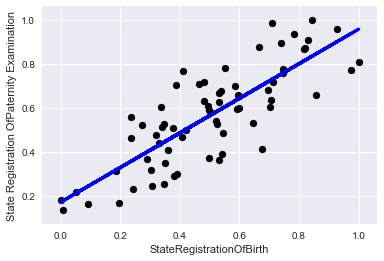

In [9]:
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, lr.predict(X_train), color='blue',
         linewidth=3)

plt.xlabel('StateRegistrationOfBirth')
plt.ylabel('State Registration OfPaternity Examination')
plt.title="Regression on train data"

График для зависимости, полученной поконтрольным данным
________
The graph for the dependence obtained from the test data

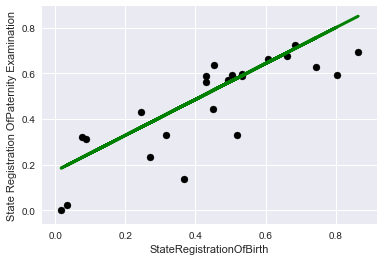

In [10]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lr.predict(X_test), color='green',
         linewidth=3)

plt.xlabel('StateRegistrationOfBirth')
plt.ylabel('State Registration OfPaternity Examination')
plt.title="Regression on test data"

##  Регрессия по нескольким признакам и Lasso регуляризация (Regression on several features and Lasso regularization)

Попробуем предсказать другой параметр - число зарегестрированных браков, на основании той части признаков, для которых ранее строили диаграммы ('StateRegistrationOfBirth', 'StateRegistrationOfMarriage',                    'StateRegistrationOfPaternityExamination', 'StateRegistrationOfDivorce','StateRegistrationOfDeath')
_________
Let's try to predict another parameter - the number of registered marriages, based on that part of the characteristics for which the charts were previously built ('StateRegistrationOfBirth', 'StateRegistrationOfMarriage', 'StateRegistrationOfPaternityExamination', 'StateRegistrationOfDivorce', 'StateRegistrationOfDeath')

In [11]:
#get main data
columns_to_show2=columns_to_show.copy()
columns_to_show2.remove("StateRegistrationOfMarriage")

#get data for a model
X = data2[columns_to_show2].values
y  = data2['StateRegistrationOfMarriage'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train=np.reshape(y_train,[y_train.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])

Обучим простою линейную регрессию на 4-х мерном векторе признаков
________
We teach a linear regression on a 4-dimensional vector of features

In [12]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_test,y_test))


Coefficients: [[-0.03475475  0.97143632 -0.44298685 -0.18245718]]
Score: 0.38137432065


Рассмотрим линейную регрессию с регуляризацией - Лассо
_______
Consider linear regression with Lasso regularization 

In [13]:
#let's look at the different alpha parameter:

#large
Rid=linear_model.Lasso (alpha = 0.01)
Rid.fit(X_train, y_train)
print(' Appha:', Rid.alpha)
print(' Coefficients:', Rid.coef_)
print(' Score:', Rid.score(X_test,y_test))

#Small
Rid=linear_model.Lasso (alpha = 0.000000001)
Rid.fit(X_train, y_train)
print('\n Appha:', Rid.alpha)
print(' Coefficients:', Rid.coef_)
print(' Score:', Rid.score(X_test,y_test))

#Optimal (for these test data)
Rid=linear_model.Lasso (alpha = 0.00025)
Rid.fit(X_train, y_train)
print('\n Appha:', Rid.alpha)
print(' Coefficients:', Rid.coef_)
print(' Score:', Rid.score(X_test,y_test))

 Appha: 0.01
 Coefficients: [ 0.          0.46642996 -0.         -0.        ]
 Score: 0.222071102783

 Appha: 1e-09
 Coefficients: [-0.03475462  0.97143616 -0.44298679 -0.18245715]
 Score: 0.38137433837

 Appha: 0.00025
 Coefficients: [-0.00387233  0.92989507 -0.42590052 -0.17411615]
 Score: 0.385551648602


Добавим откровенно бесполезный признак
_______
Add a seless feature

In [14]:
columns_to_show3=columns_to_show2.copy()
columns_to_show3.append("TotalNumber")
columns_to_show3

X = df2[columns_to_show3].values
# y hasn't changed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train=np.reshape(y_train,[y_train.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])


Для начала посмотрим на результаты без регуляризации
_________
First, look at the results without regularization

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_test,y_test))


Coefficients: [[-0.45286477 -0.08625204 -0.19375198 -0.63079401  1.57467774]]
Score: 0.999173764473


А теперь с регуляризацией (Lasso).  
При малых значениях коэффициента регуляризации получаем незначительное улучшение.
_____
And now with regularization (Lasso).
For small values of the regularization coefficient we obtain a slight improvement.

In [16]:
#Optimal (for these test data)
Rid=linear_model.Lasso (alpha = 0.00015)
Rid.fit(X_train, y_train)
print('\n Appha:', Rid.alpha)
print(' Coefficients:', Rid.coef_)
print(' Score:', Rid.score(X_test,y_test))


 Appha: 0.00015
 Coefficients: [-0.44718703 -0.07491507 -0.1944702  -0.62034146  1.55890505]
 Score: 0.999266251287


При больших значениях альфа можно посмотреть, на отбор признаков в действии
_______
For large alpha values, you can look at the selection of features in action

In [17]:
#large
Rid=linear_model.Lasso (alpha = 0.01)
Rid.fit(X_train, y_train)
print('\n Appha:', Rid.alpha)
print(' Coefficients:', Rid.coef_)
print(' Score:', Rid.score(X_test,y_test))


 Appha: 0.01
 Coefficients: [-0.         -0.         -0.         -0.05177979  0.87991931]
 Score: 0.802210158982



Резкий рост качества предсказаний можно объяснить, тем, что регистрация браков является составной величиной от общего количества.   
Рассмотрим какую часть регистраций браков можно предсказать, только на основании общего количеств регистраций
______

The increase in the quality of predictions can be explained by the fact that registration of marriages is a composite of the total.
Consider what part of the marriage registrations can be predicted, only based on the total number of registrations.

In [18]:
X_train=np.reshape(X_train[:,4],[X_train.shape[0],1])
X_test=np.reshape(X_test[:,4],[X_test.shape[0],1])

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_train,y_train))

Coefficients: [[ 1.0571131]]
Score: 0.788270672692


И взглянем на графики
____

And look at the graphics

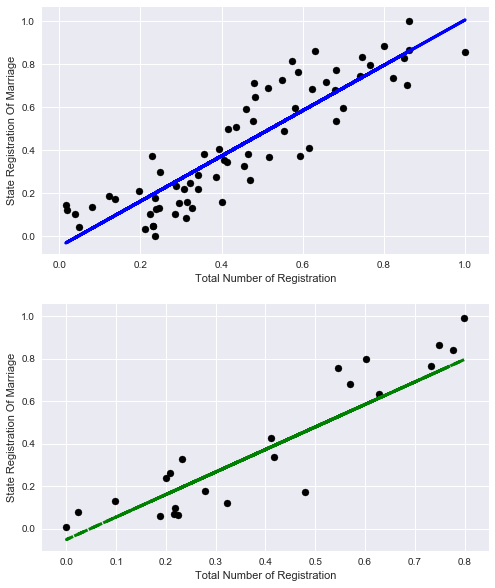

In [19]:
# plot for train data
plt.figure(figsize=(8,10))
plt.subplot(211)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, lr.predict(X_train),  color='blue',
         linewidth=3)

plt.xlabel('Total Number of Registration')
plt.ylabel('State Registration Of Marriage')
plt.title="Regression on train data"

# plot for test data
plt.subplot(212)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lr.predict(X_test), '--', color='green',
         linewidth=3)

plt.xlabel('Total Number of Registration')
plt.ylabel('State Registration Of Marriage')
plt.title="Regression on test data"

Добавим другой малополезный признак State Registration Of Name Change

_____
Add another less useful sign. State Registration Of Name Change

In [20]:
columns_to_show4=columns_to_show2.copy()
columns_to_show4.append("StateRegistrationOfNameChange")


X = df2[columns_to_show4].values
# y hasn't changed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train=np.reshape(y_train,[y_train.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_test,y_test))



Coefficients: [[ 0.06583714  1.1080889  -0.35025999 -0.24473705 -0.4513887 ]]
Score: 0.285094398157


Как видно, он нам только мешает.
____
As you can see, it's just a hindrance.

Добавим полезный признак, закодированное значение месяца в который получил количество регистраций.
____
Add a useful feature, the encoded value of the month in which the number of registrations was received.

In [21]:
#get data
columns_to_show5=columns_to_show2.copy()
columns_to_show5.append("Month")

#get data for model
X = df2[columns_to_show5].values
# y hasn't changed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train=np.reshape(y_train,[y_train.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])
#teach model and get predictions
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Score:', lr.score(X_test,y_test))

Coefficients: [[-0.10613428  0.91315175 -0.55413198 -0.13253367  0.28536285]]
Score: 0.472057997208


## Линейная регрессия для предсказания тренда (Linear regression for predicting a trend)

Вернемся к исходным данным, но рассмотрим их теперь с учетом изменения во времени.  
Для начала заменим колонку год на общее количество месяцев с момента начальной даты  
В этот раз не будем масштабировать данные, большой пользы это не принесет.
____
Let's go back to the original data, but consider them now with the change in time.
To begin with, replace the column year by the total number of months from the start date
This time we will not scale the data, it will not be of much use.

In [22]:
#get data
df3=df.copy()

#get new column
df3.Year=df.Year.map(lambda x: (x-2010)*12)+df.Month
df3.rename(columns={'Year': 'Months'}, inplace=True)

#get data for model
X=df3[columns_to_show5].values
y=df3['StateRegistrationOfMarriage'].values
train=[df3.Months<=72]
test=[df3.Months>72]
X_train=X[train]
y_train=y[train]
X_test=X[test]
y_test=y[test]
y_train=np.reshape(y_train,[y_train.shape[0],1])
y_test=np.reshape(y_test,[y_test.shape[0],1])    

#teach model and get predictions
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_[0])
print('Score:', lr.score(X_test,y_test))

Coefficients: [  2.60708376e-01   1.30751121e+01  -3.31447168e+00  -2.34368684e-01
   2.88096512e+02]
Score: 0.383195050367


Результат предсказания "не очень", но думаю лучше, чем просто наобум
  
Посмотрим на данные в графическом виде, в начале по отдельности, а потом вместе.  
Наша модель пусть и не очень хорошо, но улавливает основные особенности тренда, позволяя прогнозировать данные.
______
The result of the prediction is "not very," but I think it's better than just haphazardly
  
Let's look at the data in a graphical form, at the beginning separately, and then together.
Our model, though not very good, but captures the main features of the trend, allowing you to predict the data.


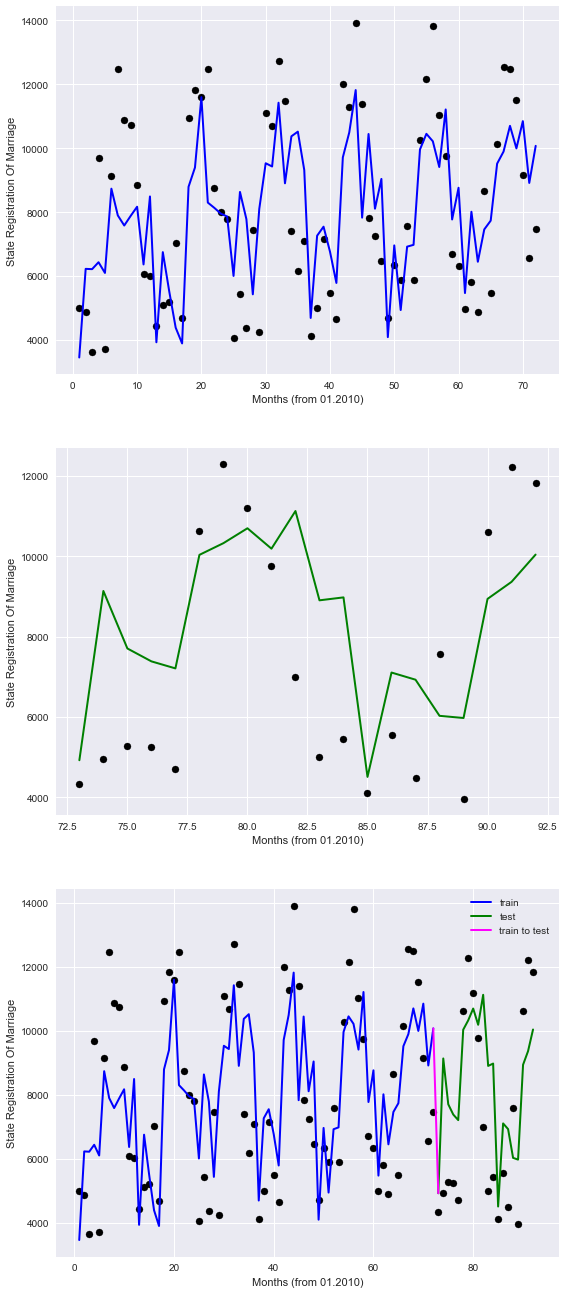

In [23]:
plt.figure(figsize=(9,23))

# plot for train data
plt.subplot(311)

plt.scatter(df3.Months.values[train], y_train,  color='black')
plt.plot(df3.Months.values[train], lr.predict(X_train),  color='blue', linewidth=2)
plt.xlabel('Months (from 01.2010)')
plt.ylabel('State Registration Of Marriage')
plt.title="Regression on train data"

# plot for test data
plt.subplot(312)

plt.scatter(df3.Months.values[test], y_test,  color='black')
plt.plot(df3.Months.values[test], lr.predict(X_test),  color='green',   linewidth=2)
plt.xlabel('Months (from 01.2010)')
plt.ylabel('State Registration Of Marriage')
plt.title="Regression (prediction) on test data"

# plot for all data
plt.subplot(313)

plt.scatter(df3.Months.values[train], y_train,  color='black')
plt.plot(df3.Months.values[train], lr.predict(X_train),  color='blue', label='train', linewidth=2)

plt.scatter(df3.Months.values[test], y_test,  color='black')
plt.plot(df3.Months.values[test], lr.predict(X_test),  color='green', label='test',  linewidth=2)

plt.title="Regression (prediction) on all data"
plt.xlabel('Months (from 01.2010)')
plt.ylabel('State Registration Of Marriage')

#plot line for link train to test
plt.plot([72,73],  lr.predict([X_train[-1],X_test[0]]) , color='magenta',linewidth=2, label='train to test')



plt.legend() 



# Бонус (Bonus)

### Повышаем точность, за счет другого подхода к месяцам  
### (Increase the accuracy, due to a different approach to the months)

Для начала заново загрузим исходную таблицу
___
For a start, reload the original table

In [24]:
df_base = pd.read_csv('https://op.mos.ru/EHDWSREST/catalog/export/get?id=230308', compression='zip', header=0, encoding='cp1251', sep=';', quotechar='"')

Попробуем применить one-hot кодирование к графе Месяц
_____ 
Let's try to apply one-hot encoding to the column Month

Coefficients: [  2.18633008e-01  -1.41397731e-01   4.56991414e-02  -5.17558633e-01
   4.48131002e+03  -2.94754108e+02  -1.14429758e+03   3.61201946e+03
   2.41208054e+03  -3.23415050e+03  -2.73587261e+03  -1.31020899e+03
   4.84757208e+02   3.37280689e+03  -2.40539320e+03  -3.23829714e+03]
Score: 0.869208071831


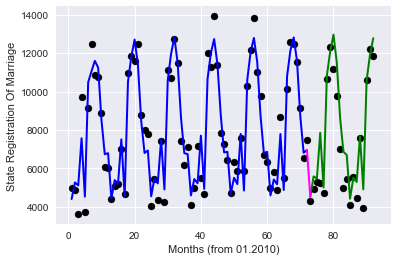

In [25]:
#get data for model

df4=df_base.copy()
df4.drop(['Year','StateRegistrationOfMarriage','ID','global_id','Unnamed: 12','TotalNumber','StateRegistrationOfNameChange','StateRegistrationOfAdoption'],axis=1,inplace=True)
df4=pd.get_dummies(df4,prefix=['Month'])

X=df4.values
X_train=X[train]
X_test=X[test]

#teach model and get predictions

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_[0])
print('Score:', lr.score(X_test,y_test))


# plot for all data
plt.scatter(df3.Months.values[train], y_train,  color='black')
plt.plot(df3.Months.values[train], lr.predict(X_train),  color='blue', label='train', linewidth=2)

plt.scatter(df3.Months.values[test], y_test,  color='black')
plt.plot(df3.Months.values[test], lr.predict(X_test),  color='green', label='test',  linewidth=2)

plt.title="Regression (prediction) on all data"
plt.xlabel('Months (from 01.2010)')
plt.ylabel('State Registration Of Marriage')

#plot line for link train to test
plt.plot([72,73],  lr.predict([X_train[-1],X_test[0]]) , color='magenta',linewidth=2, label='train to test')


Качество предсказания резко улучшилось
____________
The quality of the prediction has has greatly improved

Теперь попробуем закодировать вместо значения месяца, среднее значение регистрации браков в данный месяц, взятое на основании обучающих данных.
___  
Now try to encode instead of the month, the average value of registration of marriages in a given month, taken on the basis of training data.

Coefficients: [ 0.16556761 -0.12746446 -0.03652408 -0.21649349  0.96971467]
Score: 0.875882918435


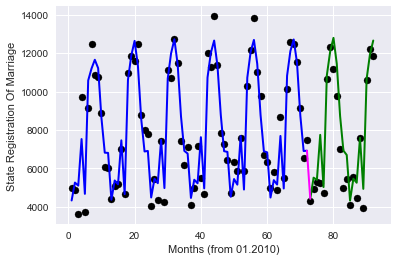

In [26]:
#get data for pandas data frame
df5=df_base.copy()

d=dict()

#get we obtain the mean value of Registration Of Marriages by months on the training data
for mon in df5.Month.unique():

    d[mon]=df5.StateRegistrationOfMarriage[df5.Month.values[train]==mon].mean()
   #d+={}  

df5['MeanMarriagePerMonth']=df5.Month.map(d)
df5.drop(['Month','Year','StateRegistrationOfMarriage','ID','global_id','Unnamed: 12','TotalNumber',
          'StateRegistrationOfNameChange','StateRegistrationOfAdoption'],axis=1,inplace=True)

#get data for model
X=df5.values
X_train=X[train]
X_test=X[test]

#teach model and get predictions
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_[0])
print('Score:', lr.score(X_test,y_test))

# plot for all data
plt.scatter(df3.Months.values[train], y_train,  color='black')
plt.plot(df3.Months.values[train], lr.predict(X_train),  color='blue', label='train', linewidth=2)

plt.scatter(df3.Months.values[test], y_test,  color='black')
plt.plot(df3.Months.values[test], lr.predict(X_test),  color='green', label='test',  linewidth=2)

plt.title="Regression (prediction) on all data"
plt.xlabel('Months (from 01.2010)')
plt.ylabel('State Registration Of Marriage')

#plot line for link train to test
plt.plot([72,73],  lr.predict([X_train[-1],X_test[0]]) , color='magenta',linewidth=2, label='train to test')

Качество предсказания стало еще немного лучше
____________
The quality of the prediction is even slightly better